Initial Centroids
[[0.90041806 0.63310146]
 [0.29214465 0.36636184]
 [0.22879817 0.07697991]]
Final Centroids:
[[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]


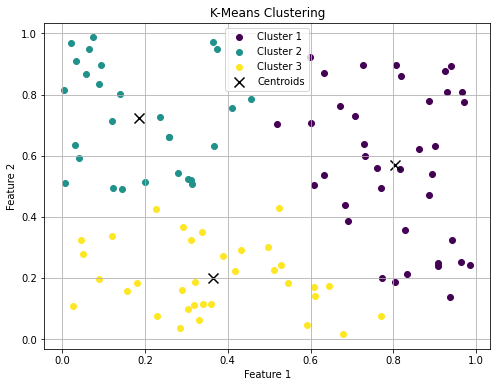

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum(np.square(point1 - point2)))

def kmeans(data, k, max_iter=100):
  
    n_samples, n_features = data.shape
    if not data.any():
        raise ValueError("Data cannot be empty for K-Means clustering.")

    k = min(k, n_samples)
    centroids = data[np.random.choice(n_samples, k, replace=False)]
    print("Initial Centroids")
    print(centroids)

    history = []
    for _ in range(max_iter):
        history.append(centroids.copy())

        # Assign data points to closest centroids using Euclidean distance
        distances = np.array([euclidean_distance(point, centroid) 
                              for point in data for centroid in centroids])
        distances = distances.reshape(n_samples, -1)
        labels = np.argmin(distances, axis=1)

        # Update centroids as the mean of points in each cluster
        for i in range(k):
            cluster_data = data[labels == i]
            if cluster_data.shape[0] > 0:  # Check for empty clusters
                centroids[i] = np.mean(cluster_data, axis=0)

        # Check for convergence (consider actual number of iterations)
        if len(history) > 1 and np.all(np.equal(centroids, history[-1])):  # Consider previous iteration
            break

    return centroids, labels, history

def plot_clusters(data, labels, centroids):
  
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(np.unique(labels))))  # Use colormap for visual distinction
    for i in range(len(np.unique(labels))):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='black', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)  # Add grid lines for better visualization
    plt.show()

# Example usage
np.random.seed(42)
data = np.random.rand(100, 2)

# Create a KMeans object with k=3 clusters and max_iter=50
try:
    kmeans_obj = kmeans(data, k=3, max_iter=50)
except ValueError as e:
    print(e)
else:
    # Get the centroids, labels, and history
    centroids, labels, history = kmeans_obj

    # Print the final centroids
    print("Final Centroids:")
    print(centroids)

    # Plot the clusters
    plot_clusters(data, labels, centroids)
